In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import os
from pandas.io.json import json_normalize

%matplotlib inline

In [3]:
%pwd

'/Users/fffte/Documents/GitHub/projects'

In [7]:
data=pd.read_csv(r'/Users/fffte/Google Drive (francisco.tenorio@aindaconsultores.com)/python/csv/electricidad/demanda18-32.csv',
                 header=0,
                 parse_dates={'Fecha':[0,1,2,3]},
                 engine='c',
                 keep_date_col=False,
                 index_col=[0])

In [8]:
display(data.head())

,Central,Oriental,Occidental,Noroeste,Norte,Noreste,Peninsula,Baja California,Baja California Sur,La Paz,Mulege,SIN,SIN8,SIN8+LPZ
Fecha,,,,,,,,,,,,,,
2018-01-01 01:00:00,5311.34,4755.19,5629.82,1761.14,1994.49,3542.70,1115.46,1229.58,251.44,236.73,14.71,24110.14,25339.72,25576.44
2018-01-01 02:00:00,5040.86,4565.01,5418.37,1695.10,1936.89,3508.32,1094.54,1159.93,231.34,217.79,13.56,23259.08,24419.02,24636.80
2018-01-01 03:00:00,4772.85,4352.28,5192.88,1674.84,1883.73,3434.59,1070.76,1073.52,223.89,210.77,13.11,22381.94,23455.46,23666.24
2018-01-01 04:00:00,4481.03,4155.01,4984.02,1643.79,1826.47,3316.93,1047.19,1035.14,213.35,200.58,12.77,21454.45,22489.59,22690.17
2018-01-01 05:00:00,4278.06,4041.10,4895.25,1602.65,1792.81,3235.83,1029.81,999.24,208.07,195.64,12.43,20875.51,21874.76,22070.40


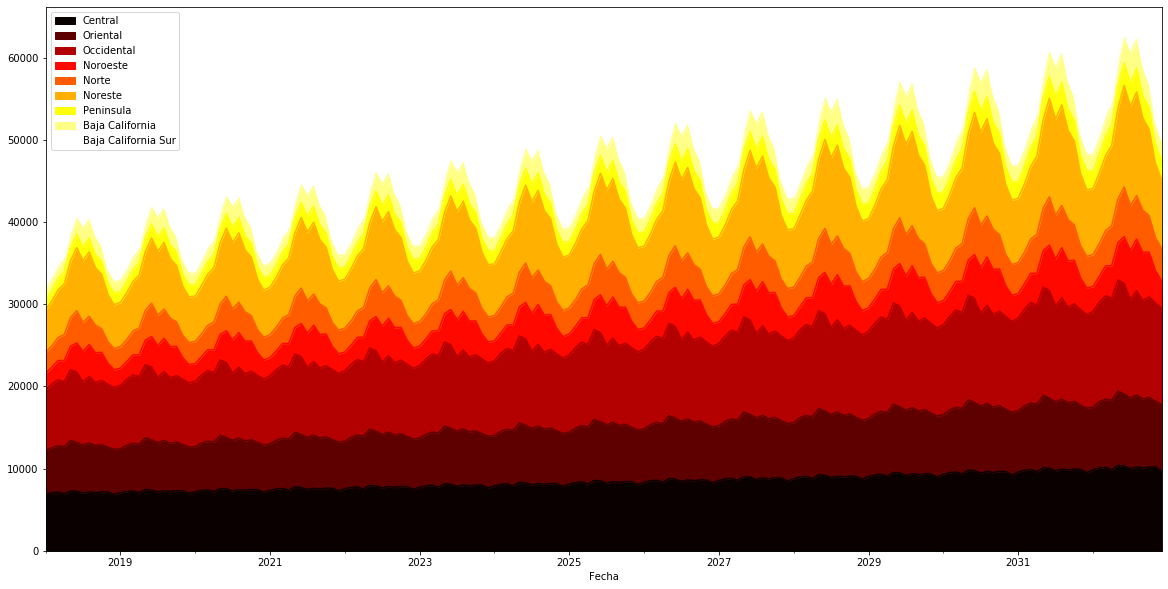

In [17]:
df=data.drop(columns=['SIN','SIN8','SIN8+LPZ','La Paz','Mulege']).resample('M').mean()
df.plot(kind='area',figsize=(20,10),cmap='hot')

In [22]:
display(df['Occidental'].describe(),
        df['Central'].describe())

count      180.000000
mean     10032.559464
std       1455.305378
min       7473.113710
25%       8826.821284
50%       9994.284924
75%      11180.758890
max      13528.033105
Name: Occidental, dtype: float64

count      180.000000
mean      8425.055266
std        950.776136
min       6861.262406
25%       7594.300202
50%       8328.832881
75%       9202.912768
max      10401.758051
Name: Central, dtype: float64

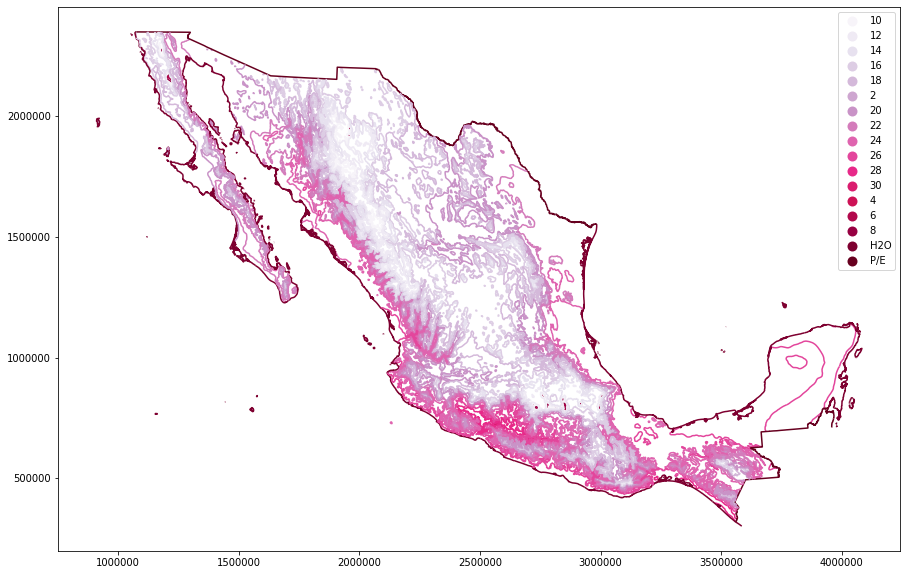

In [33]:
import descartes
import geopandas as gpd

temp=gpd.read_file(r'/Users/fffte/Desktop/python/temp.shp')
temp.plot(column='TEMP_°C',figsize=(20,10),legend='True',cmap='PuRd')

Index(['OBJECTID', 'FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'FINAL3_',
       'FINAL3_ID', 'FC', 'CLAVE', 'SHAPE_len', 'geometry'],
      dtype='object')

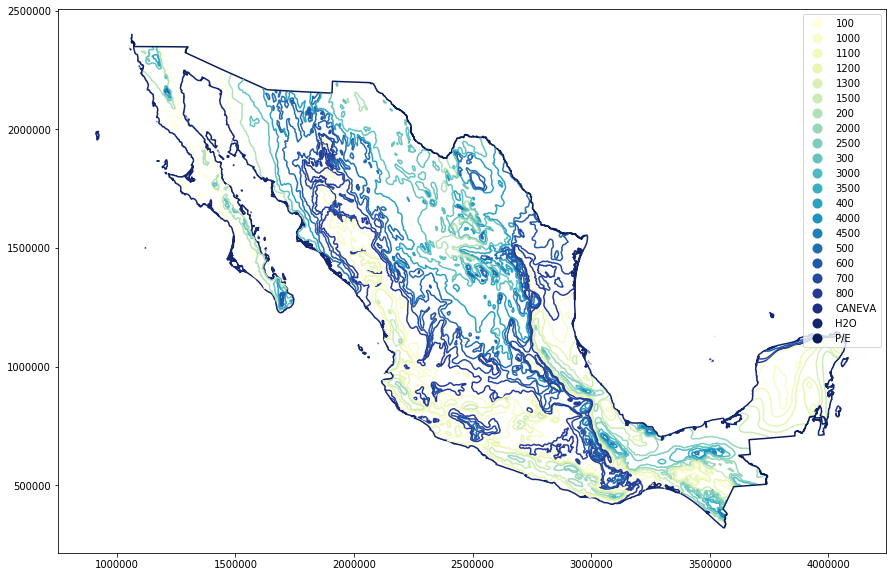

In [38]:
precipitacion=gpd.read_file(r'/Users/fffte/Desktop/python/precipitacionMediaAnual.shp')
display(precipitacion.columns)
precipitacion.plot(figsize=(20,10),column='CLAVE',legend=True,cmap='YlGnBu')

,CVE_ENT,NOM_ENT,CAPITAL,AREA,PERIMETER,COV_,COV_ID,geometry
0,01,Aguascalientes,Aguascalientes,555.867384,423.00598,0,1,"POLYGON ((-101.86167 22.02888, -101.86185 22.0..."
1,02,Baja California,Mexicali,7320.656742,3060.77271,1,2,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,03,Baja California Sur,La Paz,7135.056882,5431.78664,2,3,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,04,Campeche,Campeche,5526.707019,2999.98015,3,4,"MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ..."
4,05,Coahuila de Zaragoza,Saltillo,15065.896468,2407.15475,4,5,"POLYGON ((-99.84322 27.76986, -99.85626 27.755..."


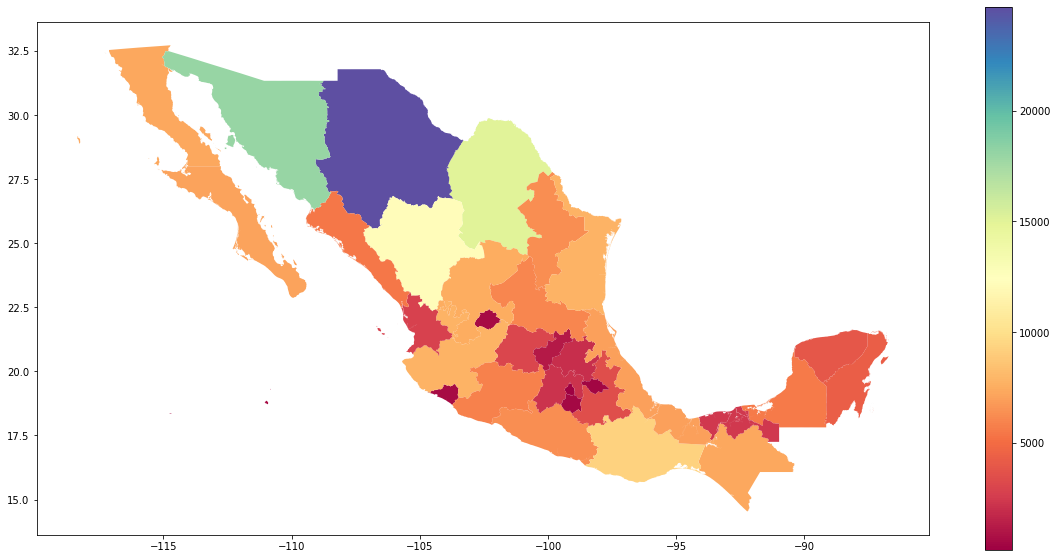

In [11]:
mex=gpd.read_file(r'/Users/fffte/Desktop/python/dest_2015gw.shp')
mex['AREA']=mex['AREA']/1000
mex.plot(column='AREA',figsize=(20,10),legend=True,cmap='Spectral')
display(mex.head())

In [12]:
estado=pd.DataFrame()
estado=mex['NOM_ENT']
display(estado)

0                      Aguascalientes
1                     Baja California
2                 Baja California Sur
3                            Campeche
4                Coahuila de Zaragoza
5                              Colima
6                             Chiapas
7                           Chihuahua
8                    Distrito Federal
9                             Durango
10                         Guanajuato
11                           Guerrero
12                            Hidalgo
13                            Jalisco
14                            MÃ©xico
15               MichoacÃ¡n de Ocampo
16                            Morelos
17                            Nayarit
18                        Nuevo LeÃ³n
19                             Oaxaca
20                             Puebla
21                         QuerÃ©taro
22                       Quintana Roo
23                   San Luis PotosÃ­
24                            Sinaloa
25                             Sonora
26          

In [39]:
estado[14,15,18,21,23,30]=['Mexico',
                           'Michoacan',
                           'Nuevo Leon',
                           'Queretaro',
                           'San Luis Potosi',
                           'Yucatan']

NameError: name 'estado' is not defined

In [14]:
consumo=pd.read_csv(r'/Users/fffte/Desktop/python/consumo_estado.csv',index_col=0)
display(consumo.head())

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
NOM_ENT,,,,,,,,,,,,,,,,
Aguascalientes,1817.00,1792.39,1826.05,2042.86,2151.79,2210.28,2187.11,2137.91,2206.41,2420.16,2468.46,2428.52,2628.56,2709.45,2751.95,2665.00
Baja California,7677.76,8049.59,8390.53,8496.35,9105.20,9223.13,9408.94,9090.26,8948.92,9316.90,9681.51,9426.16,9815.63,10011.82,10457.72,9938.46
Baja California Sur,1082.01,1126.10,1210.41,1318.42,1448.32,1577.98,1768.96,1805.01,1806.44,1970.34,2023.94,2059.26,2116.46,2201.65,2342.48,2214.88
Campeche,736.92,815.33,846.19,889.30,918.06,966.41,1032.14,1101.42,1094.65,1171.25,1223.29,1258.45,1299.29,1340.84,1388.15,1252.40
Coahuila,8957.82,8741.35,8228.36,8372.55,8552.31,8690.00,8928.54,9006.91,9244.79,10242.20,10190.01,10455.74,10551.65,10462.85,10211.89,9629.39


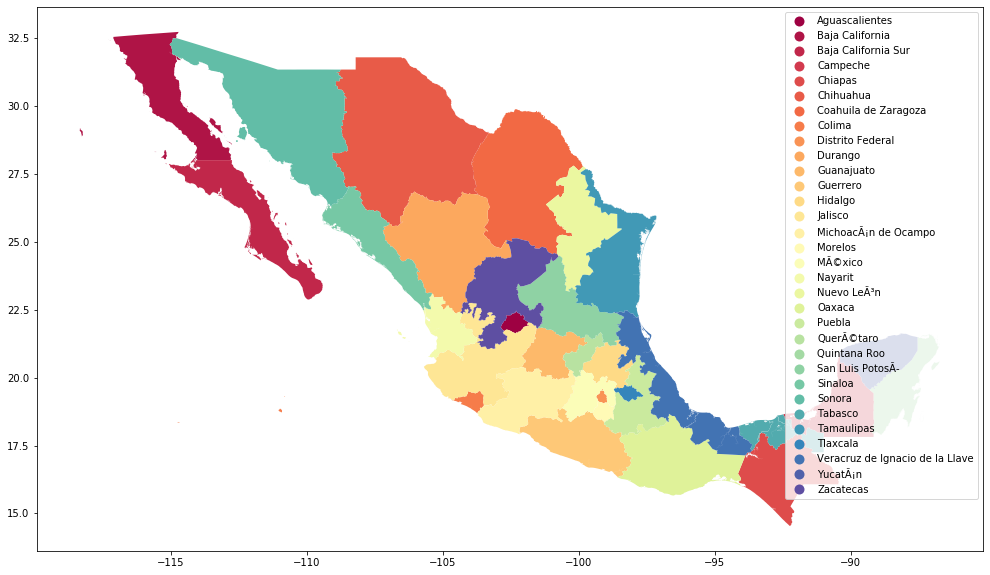

In [15]:
mex=gpd.read_file(r'/Users/fffte/Desktop/python/dest_2015gw.shp')
mex.plot(column='NOM_ENT',figsize=(20,10),legend=True,cmap='Spectral')
mex['NOM_ENT']=consumo.index

In [16]:
result=mex.set_index('NOM_ENT').join(consumo)
result.head()

,CVE_ENT,CAPITAL,AREA,PERIMETER,COV_,COV_ID,geometry,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,01,Aguascalientes,5.558674e+05,423.00598,0,1,"POLYGON ((-101.86167 22.02888, -101.86185 22.0...",1817.00,1792.39,1826.05,...,2187.11,2137.91,2206.41,2420.16,2468.46,2428.52,2628.56,2709.45,2751.95,2665.00
Baja California,02,Mexicali,7.320657e+06,3060.77271,1,2,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283...",7677.76,8049.59,8390.53,...,9408.94,9090.26,8948.92,9316.90,9681.51,9426.16,9815.63,10011.82,10457.72,9938.46
Baja California Sur,03,La Paz,7.135057e+06,5431.78664,2,3,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102...",1082.01,1126.10,1210.41,...,1768.96,1805.01,1806.44,1970.34,2023.94,2059.26,2116.46,2201.65,2342.48,2214.88
Campeche,04,Campeche,5.526707e+06,2999.98015,3,4,"MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ...",736.92,815.33,846.19,...,1032.14,1101.42,1094.65,1171.25,1223.29,1258.45,1299.29,1340.84,1388.15,1252.40
Coahuila,05,Saltillo,1.506590e+07,2407.15475,4,5,"POLYGON ((-99.84322 27.76986, -99.85626 27.755...",8957.82,8741.35,8228.36,...,8928.54,9006.91,9244.79,10242.20,10190.01,10455.74,10551.65,10462.85,10211.89,9629.39


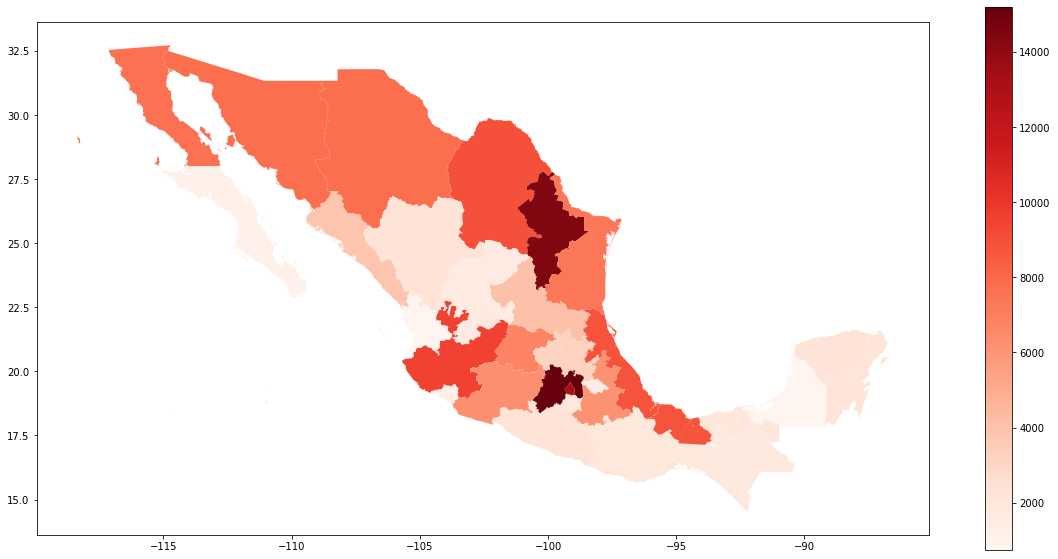

In [17]:
result.plot(column='2002',figsize=(20,10),legend=True,cmap='Reds')

In [18]:
%pwd

'/Users/fffte/Desktop/python/github'

In [19]:
municipios=gpd.read_file(r'/Users/fffte/Desktop/python/inegi/municipios/00mun.shp')
municipios.plot(column='NOMGEO',figsize=(20,10),cmap='Spectral')
display(municipios.head())

DriverError: /Users/fffte/Desktop/python/inegi/municipios/00mun.shp: No such file or directory

,Ene/2005,5-Feb,5-Mar,Abr/2005,5-May,5-Jun,5-Jul,Ago/2005,5-Sep,5-Oct,...,18-Mar,Abr/2018,18-May,18-Jun,18-Jul,Ago/2018,18-Sep,18-Oct,18-Nov,Dic/2018
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,312818,313639,314772,315322,316532,316626,317454,318745,320759,321688,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Baja California,878275,879982,882837,887858,890538,895759,900416,904372,907498,910449,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Baja California Sur,172953,173904,174640,175740,176641,178039,178973,180647,181351,182416,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Campeche,192400,193381,193637,194144,194982,196378,196812,197620,198857,199409,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Chiapas,970334,973702,977942,982422,987516,993146,997147,1002090,1006264,1004280,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D


(32, 168)

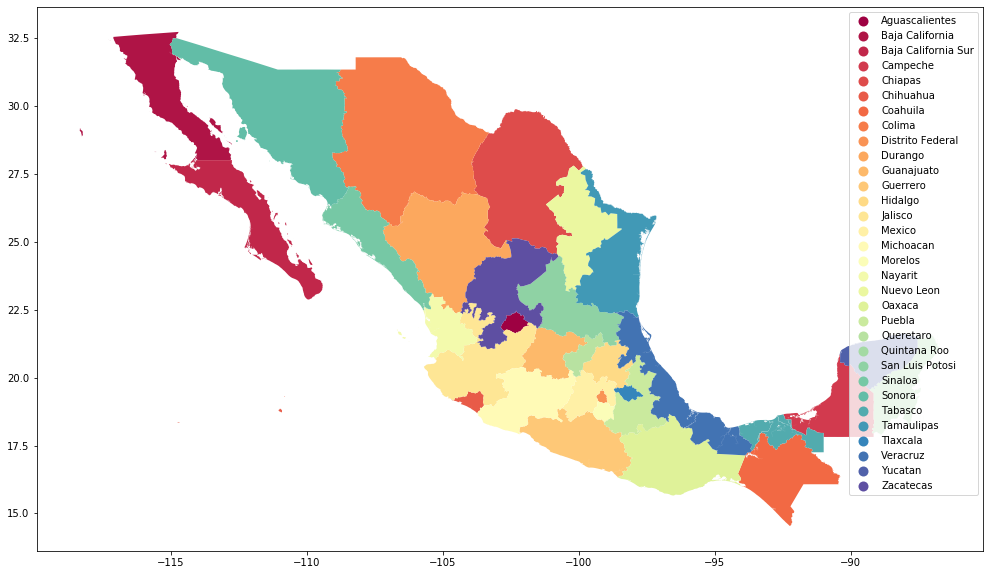

In [21]:
usuarios=pd.read_csv(r'/Users/fffte/Desktop/python/usuarios.csv',index_col=0)
display(usuarios.head(),usuarios.shape)

mex=gpd.read_file(r'/Users/fffte/Desktop/python/dest_2015gw.shp')
mex['NOM_ENT']=usuarios.index
mex.plot(column='NOM_ENT',figsize=(20,10),legend=True,cmap='Spectral')

In [22]:
result2=mex.set_index('NOM_ENT').join(usuarios)
result2.head()

,CVE_ENT,CAPITAL,AREA,PERIMETER,COV_,COV_ID,geometry,Ene/2005,5-Feb,5-Mar,...,18-Mar,Abr/2018,18-May,18-Jun,18-Jul,Ago/2018,18-Sep,18-Oct,18-Nov,Dic/2018
NOM_ENT,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,01,Aguascalientes,5.558674e+05,423.00598,0,1,"POLYGON ((-101.86167 22.02888, -101.86185 22.0...",312818,313639,314772,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Baja California,02,Mexicali,7.320657e+06,3060.77271,1,2,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283...",878275,879982,882837,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Baja California Sur,03,La Paz,7.135057e+06,5431.78664,2,3,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102...",172953,173904,174640,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Campeche,04,Campeche,5.526707e+06,2999.98015,3,4,"MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ...",192400,193381,193637,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D
Chiapas,05,Saltillo,1.506590e+07,2407.15475,4,5,"POLYGON ((-99.84322 27.76986, -99.85626 27.755...",970334,973702,977942,...,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D


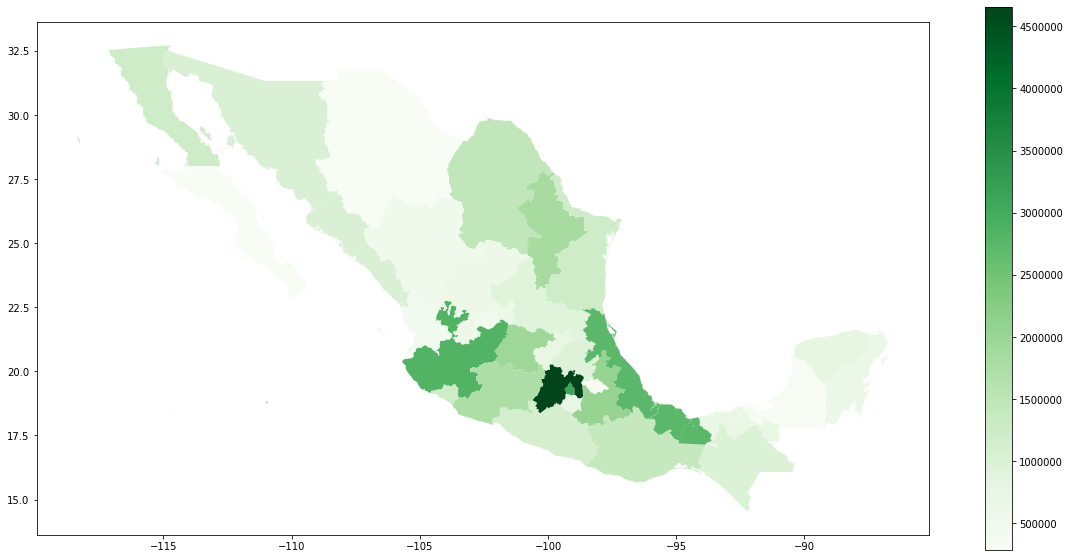

In [23]:
result2.plot(column='Dic/2016',figsize=(20,10),legend=True,cmap='Greens')

In [24]:
%pwd

'/Users/fffte/Desktop/python/github'

In [88]:
desocupacion=pd.read_csv(r'/Users/fffte/Desktop/python/github/desocupacion.csv')
desocupacion=desocupacion.drop(labels='Periodo',axis=1).dropna(axis=0)
display(desocupacion)

,Aguascalientes,Baja California,Baja California Sur,Campeche,Coahuila de Zaragoza,Colima,Chiapas,Chihuahua,Distrito Federal,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
1,4.139495,3.069368,4.649049,3.175,4.481603,4.326304,3.396994,3.206931,5.908371,4.412253,...,3.302178,2.905539,4.487303,5.380023,7.246383,4.882852,4.421501,3.839442,2.067626,3.225696
2,4.149856,2.462983,4.571572,3.410,4.529787,4.453574,3.113938,3.522985,4.971083,4.910785,...,3.296297,2.340255,3.778552,5.185028,7.269682,4.855036,4.006480,3.589659,2.280119,3.037173
3,3.391991,2.618694,4.767524,4.247,4.335602,4.018907,3.075509,3.207072,4.835448,4.544081,...,2.699426,2.352488,3.593059,5.096450,7.302102,4.457857,4.279200,3.361373,1.807510,2.866281
4,3.869090,2.400203,4.318779,3.929,4.353031,3.471627,2.799445,2.700449,4.421947,3.940862,...,3.567002,2.145742,3.084113,4.326104,7.375921,4.355514,3.705692,3.512219,1.955347,2.209938
6,3.580813,3.097377,4.830851,3.734,4.568646,3.402679,2.827662,2.934468,3.963076,3.967188,...,3.424690,1.999366,3.573321,3.750363,6.855247,4.607759,3.578951,3.571978,2.110327,2.649189
7,4.205338,2.866148,4.374525,4.017,4.631042,3.991204,2.222807,2.492153,4.812157,3.928087,...,2.941031,2.574516,3.750072,3.811539,7.535403,3.664855,3.836854,3.535506,2.048863,2.990848
8,3.150715,2.682858,4.107215,4.027,4.127522,3.549565,2.914619,2.450145,4.959914,3.549031,...,3.092797,2.273980,3.528584,3.654067,6.940158,4.003916,3.752430,3.126272,2.073155,2.560269
9,3.827140,2.937295,4.129753,3.417,4.154913,3.555394,2.519569,3.078136,4.615358,3.709345,...,2.975513,2.485662,3.812686,3.734246,6.906780,4.124544,3.741162,3.965038,1.833935,2.823655
11,3.722786,2.246313,3.773735,2.625,4.084589,3.350375,2.216933,3.608208,3.920569,4.198244,...,2.713293,2.869164,2.452770,3.393999,7.395080,3.845705,3.776627,2.866394,2.058168,3.527532
12,3.345946,2.674309,3.713522,3.322,3.727133,2.740197,2.751437,3.082658,4.982111,3.651237,...,2.768002,2.386263,3.750812,3.651788,6.601930,4.040689,3.385896,3.279588,1.640294,2.455441


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [63]:
display(usuarios.index)

Index(['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche',
       'Chiapas', 'Chihuahua', 'Coahuila', 'Colima', 'Distrito Federal',
       'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Mexico',
       'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla',
       'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora',
       'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan',
       'Zacatecas'],
      dtype='object', name='NOM_ENT')

In [77]:
desocupacion.plot(kind='scatter',figsize=(20,10))

ValueError: scatter requires an x and y column

In [ ]:
mex=gpd.read_file(r'/Users/fffte/Desktop/python/dest_2015gw.shp')
mex.plot(column='NOM_ENT',figsize=(20,10),legend=True,cmap='Spectral')
mex['NOM_ENT']=consumo.index

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=mex['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [3]:
import descartes
import geopandas as gpd

,gid,nombre_poz,campo,entidad_fe,ubicacion,clasificac,estado_act,tipo_hidro,anno_perfo,profundida,profundi_1,trayectori,disponibil,geometry
0,7016875.0,KU-52,KU,AGUAS TERRITORIALES,MARINO,DESARROLLO,INACTIVO,ACEITE Y GAS,2016.0,3300.0,NaN,DIRECCIONAL,Disponible,POINT (-92.17375 19.49335)
1,239089.0,KU-55,KU,AGUAS TERRITORIALES,MARINO,DESARROLLO,INACTIVO,ACEITE,2008.0,3771.0,3186.0,DIRECCIONAL,Disponible,POINT (-92.15450 19.51500)
2,251078.0,KU-60,KU,AGUAS TERRITORIALES,MARINO,DESARROLLO,INACTIVO,ACEITE,2014.0,NaN,NaN,None,Disponible,POINT (-92.15017 19.49513)
3,232417.0,KU-61,KU,AGUAS TERRITORIALES,MARINO,DESARROLLO,PRODUCTOR,ACEITE,1986.0,3500.0,3136.7,DIRECCIONAL,Disponible,POINT (-92.17387 19.49497)
4,232422.0,KU-62,KU,AGUAS TERRITORIALES,MARINO,DESARROLLO,INACTIVO,None,1988.0,3690.0,2920.6,DIRECCIONAL,Disponible,POINT (-92.17391 19.49494)


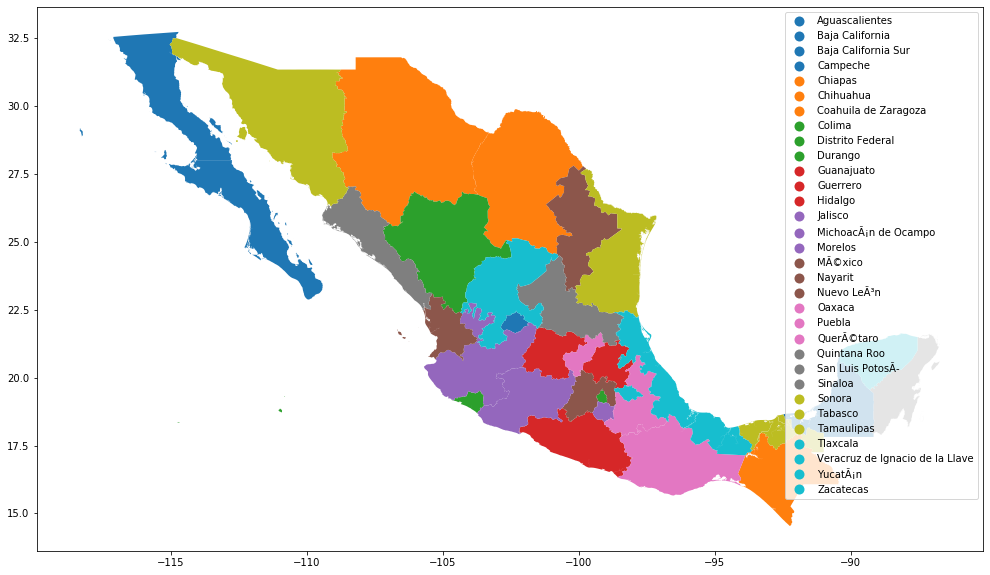

In [9]:
pozos=gpd.read_file(r'C:\Users\elias\Downloads\Pozos Aguas Someras\Pozos Aguas Someras.shp')
mex=gpd.read_file(r'C:\Users\elias\Google Drive\python\shapefiles\estados\dest_2015gw.shp')

mex.plot(column='NOM_ENT',figsize=(20,10),legend=True)
display(pozos.head())


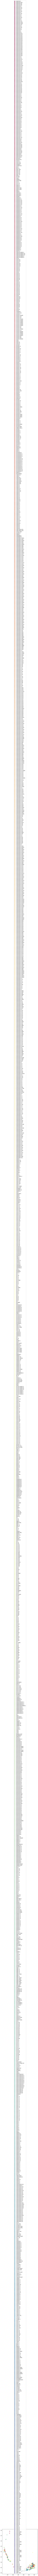

In [13]:
pozos.plot(column='nombre_poz',figsize=(20,10),legend=True,cmap='Spectral')